<a href="https://colab.research.google.com/github/ShravyaMalogi/PROJECT_drafts/blob/main/Psychological.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 2

In [40]:
import pandas as pd

# Load childhood trauma data
trauma_file_path = "childhood_trauma.xlsx"
trauma_df = pd.read_excel(trauma_file_path)

# Load attachment styles data
attachment_file_path = "attachment_styles.xlsx"
attachment_df = pd.read_excel(attachment_file_path)

/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [41]:
# Rename 'vastra' to 'age' in trauma dataset
trauma_df.rename(columns={"varsta": "age"}, inplace=True)

In [42]:
# Merge on "Varsta" (Age)
merged_df = pd.merge(trauma_df, attachment_df, left_on="Varsta", right_on="TOTAL", how="inner")

# Drop duplicate age column
merged_df.drop(columns=["TOTAL"], errors="ignore", inplace=True)

# Display merged data
print("Merged Dataset:")
display(merged_df.head())

Merged Dataset:


,Variable,CTQ1,CTQ2,CTQ3,CTQ4,CTQ5,CTQ6,CTQ7,CTQ8,CTQ9,...,Q44_27,Q44_28,Q44_29,Q44_30,Q44_31,Q44_32,Proximity Maintenance,Sensitivity,Controlling C,Compulsive C
0,Label,trauma din copilarie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Using the 6 point scale from 'not at all descr...,Using the 6 point scale from 'not at all descr...,Using the 6 point scale from 'not at all descr...,Using the 6 point scale from 'not at all descr...,Using the 6 point scale from 'not at all descr...,Using the 6 point scale from 'not at all descr...,NaN,NaN,NaN,NaN
1,NaN,1,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,...,2,5,5,1,4,3,32.0,38.0,17.0,21.0
2,NaN,1,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,...,3,6,5,2,1,1,38.0,43.0,17.0,24.0
3,NaN,1,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,...,3,5,5,1,1,3,37.0,34.0,19.0,25.0
4,NaN,1,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,...,4,4,6,2,2,2,43.0,34.0,18.0,33.0


In [43]:
# Define categories
def categorize_attachment(row):
    if row["Avoidance "] < 3 and row["Anxiety"] < 3:
        return "Secure"
    elif row["Avoidance "] >= 3 and row["Anxiety"] < 3:
        return "Avoidant"
    elif row["Avoidance "] < 3 and row["Anxiety"] >= 3:
        return "Anxious"
    else:
        return "Fearful"

# Apply the function
merged_df["Attachment Category"] = merged_df.apply(categorize_attachment, axis=1)

# Display updated dataset
print("Dataset with Attachment Categories:")
display(merged_df[["Avoidance ", "Anxiety", "Attachment Category"]].head())

Dataset with Attachment Categories:


,Avoidance,Anxiety,Attachment Category
0,NaN,NaN,Fearful
1,24.0,5.0,Fearful
2,20.0,6.0,Fearful
3,24.0,10.0,Fearful
4,28.0,5.0,Fearful


In [44]:
# Create a dictionary mapping old trauma labels to new ones (mix of positive & negative)
renamed_ctq_columns = {
    "CTQ1": "Emotional Support from Parents",
    "CTQ2": "Strong Bond with a Caregiver",
    "CTQ3": "Encouragement & Validation",
    "CTQ4": "Feeling Loved & Wanted",
    "CTQ5": "Parental Warmth & Affection",
    "CTQ6": "Stable & Secure Home",
    "CTQ7": "Healthy Boundaries & Discipline",
    "CTQ8": "Supportive Siblings",
    "CTQ9": "Safe & Positive School",
    "CTQ10": "Healthy Peer Relationships",
    "CTQ11": "Extracurricular Activities",
    "CTQ12": "Encouragement of Independence",
    "CTQ13": "Parents Modeled Healthy Relationships",
    "CTQ14": "Freedom to Express Emotions",
    "CTQ15": "Feeling Protected & Safe",
    "CTQ16": "Emotional Neglect",
    "CTQ17": "Emotional Abuse",
    "CTQ18": "Physical Neglect",
    "CTQ19": "Physical Abuse",
    "CTQ20": "Sexual Abuse",
    "CTQ21": "Parental Divorce/Separation",
    "CTQ22": "Parental Substance Abuse",
    "CTQ23": "Parental Mental Illness",
    "CTQ24": "Witnessing Domestic Violence",
    "CTQ25": "Loss of a Parent",
    "CTQ26": "Verbal Abuse",
    "CTQ27": "Bullying",
    "CTQ28": "Frequent Moving",
    "CTQ29": "Parental Favoritism",
    "CTQ30": "Excessive Pressure to Succeed"
}

# Rename the columns
trauma_df.rename(columns=renamed_ctq_columns, inplace=True)

# Verify changes
print(trauma_df.head())

  Variable Emotional Support from Parents  Strong Bond with a Caregiver  \
0    Label           trauma din copilarie                           NaN   
1      NaN                              3                           3.0   
2      NaN                              1                           3.0   
3      NaN                              4                           3.0   
4      NaN                              1                           1.0   

   Encouragement & Validation  Feeling Loved & Wanted  \
0                         NaN                     NaN   
1                         3.0                     3.0   
2                         2.0                     3.0   
3                         2.0                     4.0   
4                         1.0                     2.0   

   Parental Warmth & Affection  Stable & Secure Home  \
0                          NaN                   NaN   
1                          3.0                   3.0   
2                          4.0        

In [63]:
# Rename childhood trauma columns for clarity
ctq_columns = [col for col in merged_df.columns if "CTQ" in col]
renamed_ctq_columns = {col: f"Trauma_{i+1}" for i, col in enumerate(ctq_columns)}
merged_df.rename(columns=renamed_ctq_columns, inplace=True)

# Display new column names
print("Renamed Trauma Columns:", renamed_ctq_columns)

# Convert trauma columns to numeric (ignore errors to avoid issues with non-numeric data)
for col in renamed_ctq_columns.values():
    merged_df[col] = pd.to_numeric(merged_df[col], errors="coerce")

# Check if the conversion worked
print(merged_df.dtypes)

Renamed Trauma Columns: {'CTQ1': 'Trauma_1', 'CTQ2': 'Trauma_2', 'CTQ3': 'Trauma_3', 'CTQ4': 'Trauma_4', 'CTQ5': 'Trauma_5', 'CTQ6': 'Trauma_6', 'CTQ7': 'Trauma_7', 'CTQ8': 'Trauma_8', 'CTQ9': 'Trauma_9', 'CTQ10': 'Trauma_10', 'CTQ11': 'Trauma_11', 'CTQ12': 'Trauma_12', 'CTQ13': 'Trauma_13', 'CTQ14': 'Trauma_14', 'CTQ15': 'Trauma_15', 'CTQ16': 'Trauma_16', 'CTQ17': 'Trauma_17', 'CTQ18': 'Trauma_18', 'CTQ19': 'Trauma_19', 'CTQ20': 'Trauma_20', 'CTQ21': 'Trauma_21', 'CTQ22': 'Trauma_22', 'CTQ23': 'Trauma_23', 'CTQ24': 'Trauma_24', 'CTQ25': 'Trauma_25', 'CTQ': 'Trauma_26', 'ZCTQ': 'Trauma_27', 'CTQxcomps': 'Trauma_28', 'CTQxflexibility': 'Trauma_29'}
Variable                  object
Trauma_1                 float64
Trauma_2                 float64
Trauma_3                 float64
Trauma_4                 float64
                          ...   
Proximity Maintenance    float64
Sensitivity              float64
Controlling C            float64
Compulsive C             float64
Attachment Cat

In [64]:
# Get the intersection of existing columns and expected trauma columns
existing_trauma_cols = [col for col in renamed_ctq_columns.values() if col in merged_df.columns]

# Convert only existing trauma columns to numeric
for col in existing_trauma_cols:
    merged_df[col] = pd.to_numeric(merged_df[col], errors="coerce")

# Verify changes
print(merged_df[existing_trauma_cols].dtypes)

Trauma_1     float64
Trauma_2     float64
Trauma_3     float64
Trauma_4     float64
Trauma_5     float64
Trauma_6     float64
Trauma_7     float64
Trauma_8     float64
Trauma_9     float64
Trauma_10    float64
Trauma_11    float64
Trauma_12    float64
Trauma_13    float64
Trauma_14    float64
Trauma_15    float64
Trauma_16    float64
Trauma_17    float64
Trauma_18    float64
Trauma_19    float64
Trauma_20    float64
Trauma_21    float64
Trauma_22    float64
Trauma_23    float64
Trauma_24    float64
Trauma_25    float64
Trauma_26    float64
Trauma_27    float64
Trauma_28    float64
Trauma_29    float64
dtype: object


In [65]:
# Ensure categories are properly named
merged_df["Attachment Category"] = merged_df["Attachment Category"].replace({
    "secure": "Secure",
    "avoidant": "Avoidant",
    "anxious": "Anxious"
})

# Verify unique values
print(merged_df["Attachment Category"].unique())

['Fearful']


In [66]:
# Standardize attachment style names
merged_df["Attachment Category"] = merged_df["Attachment Category"].str.strip().str.capitalize()

print(merged_df["Attachment Category"].unique())  # Verify the changes

['Fearful']


In [67]:
print("Available columns in merged_df:", merged_df.columns.tolist())

Available columns in merged_df: ['Variable', 'Trauma_1', 'Trauma_2', 'Trauma_3', 'Trauma_4', 'Trauma_5', 'Trauma_6', 'Trauma_7', 'Trauma_8', 'Trauma_9', 'Trauma_10', 'Trauma_11', 'Trauma_12', 'Trauma_13', 'Trauma_14', 'Trauma_15', 'Trauma_16', 'Trauma_17', 'Trauma_18', 'Trauma_19', 'Trauma_20', 'Trauma_21', 'Trauma_22', 'Trauma_23', 'Trauma_24', 'Trauma_25', 'MPFI1', 'MPFI2', 'MPFI3', 'MPFI4', 'MPFI5', 'MPFI6', 'MPFI7', 'MPFI8', 'MPFI9', 'MPFI10', 'MPFI11', 'MPFI12', 'MPFI13', 'MPFI14', 'MPFI15', 'MPFI16', 'MPFI17', 'MPFI18', 'MPFI19', 'MPFI20', 'MPFI21', 'MPFI22', 'MPFI23', 'MPFI24', 'MPFI25', 'MPFI26', 'MPFI27', 'MPFI28', 'MPFI29', 'MPFI30', 'SCS1', 'SCS2', 'SCS3', 'SCS4', 'SCS5', 'SCS6', 'SCS7', 'SCS8', 'SCS9', 'SCS10', 'SCS11', 'SCS12', 'PWB1', 'PWB2', 'PWB3', 'PWB4', 'PWB5', 'PWB6', 'PWB7', 'PWB8', 'PWB9', 'PWB10', 'PWB11', 'PWB12', 'PWB13', 'PWB14', 'PWB15', 'PWB16', 'PWB17', 'PWB18', 'LEC1', 'LEC2', 'LEC3', 'LEC4', 'LEC5', 'LEC6', 'LEC7', 'LEC8', 'LEC9', 'LEC10', 'Studii', 'Orie

In [68]:
existing_trauma_cols = [col for col in renamed_ctq_columns.values() if col in merged_df.columns]
print("Existing trauma columns:", existing_trauma_cols)  # Debugging step

Existing trauma columns: ['Trauma_1', 'Trauma_2', 'Trauma_3', 'Trauma_4', 'Trauma_5', 'Trauma_6', 'Trauma_7', 'Trauma_8', 'Trauma_9', 'Trauma_10', 'Trauma_11', 'Trauma_12', 'Trauma_13', 'Trauma_14', 'Trauma_15', 'Trauma_16', 'Trauma_17', 'Trauma_18', 'Trauma_19', 'Trauma_20', 'Trauma_21', 'Trauma_22', 'Trauma_23', 'Trauma_24', 'Trauma_25', 'Trauma_26', 'Trauma_27', 'Trauma_28', 'Trauma_29']


In [69]:
# Check if "Attachment Category" exists before grouping
if "Attachment Category" in merged_df.columns:
    # Group by attachment style and compute mean trauma scores
    attachment_trauma = merged_df.groupby("Attachment Category")[existing_trauma_cols].mean()

    # Display the transformed data
    print(attachment_trauma)
else:
    print("Error: 'Attachment Category' column is missing from merged_df")

                     Trauma_1  Trauma_2  Trauma_3  Trauma_4  Trauma_5  \
Attachment Category                                                     
Fearful              2.760937  2.051563  2.748438  2.242188    2.8875   

                     Trauma_6  Trauma_7  Trauma_8  Trauma_9  Trauma_10  ...  \
Attachment Category                                                     ...   
Fearful              1.390625  1.995313  2.084375  1.970312   1.295313  ...   

                     Trauma_20  Trauma_21  Trauma_22  Trauma_23  Trauma_24  \
Attachment Category                                                          
Fearful               2.521875   1.935938    2.14375   1.609375   1.557813   

                     Trauma_25  Trauma_26  Trauma_27  Trauma_28  Trauma_29  
Attachment Category                                                         
Fearful               1.603125  50.084375   0.179867  -0.231795  -0.173428  

[1 rows x 29 columns]


In [70]:
# Ensure "Attachment Category" is standardized
merged_df["Attachment Category"] = merged_df["Attachment Category"].str.strip().str.capitalize()

# Get only existing trauma columns
existing_trauma_cols = [col for col in renamed_ctq_columns.values() if col in merged_df.columns]

# Debugging: Check available columns
print("Existing trauma columns:", existing_trauma_cols)
print("Available attachment categories:", merged_df["Attachment Category"].unique())

# Group by attachment style and compute mean trauma scores
if "Attachment Category" in merged_df.columns and existing_trauma_cols:
    attachment_trauma = merged_df.groupby("Attachment Category")[existing_trauma_cols].mean()
    print(attachment_trauma)
else:
    print("Error: Required columns are missing")

Existing trauma columns: ['Trauma_1', 'Trauma_2', 'Trauma_3', 'Trauma_4', 'Trauma_5', 'Trauma_6', 'Trauma_7', 'Trauma_8', 'Trauma_9', 'Trauma_10', 'Trauma_11', 'Trauma_12', 'Trauma_13', 'Trauma_14', 'Trauma_15', 'Trauma_16', 'Trauma_17', 'Trauma_18', 'Trauma_19', 'Trauma_20', 'Trauma_21', 'Trauma_22', 'Trauma_23', 'Trauma_24', 'Trauma_25', 'Trauma_26', 'Trauma_27', 'Trauma_28', 'Trauma_29']
Available attachment categories: ['Fearful']
                     Trauma_1  Trauma_2  Trauma_3  Trauma_4  Trauma_5  \
Attachment Category                                                     
Fearful              2.760937  2.051563  2.748438  2.242188    2.8875   

                     Trauma_6  Trauma_7  Trauma_8  Trauma_9  Trauma_10  ...  \
Attachment Category                                                     ...   
Fearful              1.390625  1.995313  2.084375  1.970312   1.295313  ...   

                     Trauma_20  Trauma_21  Trauma_22  Trauma_23  Trauma_24  \
Attachment Category      

In [71]:
# Print all column names to check for mismatches
print("Columns in merged_df:", merged_df.columns.tolist())

# Check if "Attachment Category" exists (fix any naming issues)
for col in merged_df.columns:
    if "attachment" in col.lower():
        print(f"Possible match for 'Attachment Category': {col}")

# Ensure column names are cleaned (remove extra spaces)
merged_df.columns = merged_df.columns.str.strip()

# Re-run check after stripping spaces
if "Attachment Category" not in merged_df.columns:
    print("Error: 'Attachment Category' column is missing. Check dataset!")

# Get valid trauma columns (avoid KeyError)
existing_trauma_cols = [col for col in renamed_ctq_columns.values() if col in merged_df.columns]

# Print valid trauma columns for confirmation
print("Valid trauma columns:", existing_trauma_cols)

Columns in merged_df: ['Variable', 'Trauma_1', 'Trauma_2', 'Trauma_3', 'Trauma_4', 'Trauma_5', 'Trauma_6', 'Trauma_7', 'Trauma_8', 'Trauma_9', 'Trauma_10', 'Trauma_11', 'Trauma_12', 'Trauma_13', 'Trauma_14', 'Trauma_15', 'Trauma_16', 'Trauma_17', 'Trauma_18', 'Trauma_19', 'Trauma_20', 'Trauma_21', 'Trauma_22', 'Trauma_23', 'Trauma_24', 'Trauma_25', 'MPFI1', 'MPFI2', 'MPFI3', 'MPFI4', 'MPFI5', 'MPFI6', 'MPFI7', 'MPFI8', 'MPFI9', 'MPFI10', 'MPFI11', 'MPFI12', 'MPFI13', 'MPFI14', 'MPFI15', 'MPFI16', 'MPFI17', 'MPFI18', 'MPFI19', 'MPFI20', 'MPFI21', 'MPFI22', 'MPFI23', 'MPFI24', 'MPFI25', 'MPFI26', 'MPFI27', 'MPFI28', 'MPFI29', 'MPFI30', 'SCS1', 'SCS2', 'SCS3', 'SCS4', 'SCS5', 'SCS6', 'SCS7', 'SCS8', 'SCS9', 'SCS10', 'SCS11', 'SCS12', 'PWB1', 'PWB2', 'PWB3', 'PWB4', 'PWB5', 'PWB6', 'PWB7', 'PWB8', 'PWB9', 'PWB10', 'PWB11', 'PWB12', 'PWB13', 'PWB14', 'PWB15', 'PWB16', 'PWB17', 'PWB18', 'LEC1', 'LEC2', 'LEC3', 'LEC4', 'LEC5', 'LEC6', 'LEC7', 'LEC8', 'LEC9', 'LEC10', 'Studii', 'Orientare_rel'

In [72]:
print("Columns in merged_df:\n", merged_df.columns.tolist())  # Shows all columns
print("Renamed trauma columns:\n", list(renamed_ctq_columns.values()))  # Shows expected columns

Columns in merged_df:
 ['Variable', 'Trauma_1', 'Trauma_2', 'Trauma_3', 'Trauma_4', 'Trauma_5', 'Trauma_6', 'Trauma_7', 'Trauma_8', 'Trauma_9', 'Trauma_10', 'Trauma_11', 'Trauma_12', 'Trauma_13', 'Trauma_14', 'Trauma_15', 'Trauma_16', 'Trauma_17', 'Trauma_18', 'Trauma_19', 'Trauma_20', 'Trauma_21', 'Trauma_22', 'Trauma_23', 'Trauma_24', 'Trauma_25', 'MPFI1', 'MPFI2', 'MPFI3', 'MPFI4', 'MPFI5', 'MPFI6', 'MPFI7', 'MPFI8', 'MPFI9', 'MPFI10', 'MPFI11', 'MPFI12', 'MPFI13', 'MPFI14', 'MPFI15', 'MPFI16', 'MPFI17', 'MPFI18', 'MPFI19', 'MPFI20', 'MPFI21', 'MPFI22', 'MPFI23', 'MPFI24', 'MPFI25', 'MPFI26', 'MPFI27', 'MPFI28', 'MPFI29', 'MPFI30', 'SCS1', 'SCS2', 'SCS3', 'SCS4', 'SCS5', 'SCS6', 'SCS7', 'SCS8', 'SCS9', 'SCS10', 'SCS11', 'SCS12', 'PWB1', 'PWB2', 'PWB3', 'PWB4', 'PWB5', 'PWB6', 'PWB7', 'PWB8', 'PWB9', 'PWB10', 'PWB11', 'PWB12', 'PWB13', 'PWB14', 'PWB15', 'PWB16', 'PWB17', 'PWB18', 'LEC1', 'LEC2', 'LEC3', 'LEC4', 'LEC5', 'LEC6', 'LEC7', 'LEC8', 'LEC9', 'LEC10', 'Studii', 'Orientare_rel

In [73]:
# Find valid trauma columns
existing_trauma_cols = [col for col in renamed_ctq_columns.values() if col in merged_df.columns]

# Debug print to confirm
print("Valid trauma columns:\n", existing_trauma_cols)

# Ensure "Attachment Category" exists
if "Attachment Category" not in merged_df.columns:
    raise KeyError("Error: 'Attachment Category' column is missing! Check dataset.")

# Group by attachment style and compute mean trauma scores
attachment_trauma = merged_df.groupby("Attachment Category")[existing_trauma_cols].mean()

print(attachment_trauma)

Valid trauma columns:
 ['Trauma_1', 'Trauma_2', 'Trauma_3', 'Trauma_4', 'Trauma_5', 'Trauma_6', 'Trauma_7', 'Trauma_8', 'Trauma_9', 'Trauma_10', 'Trauma_11', 'Trauma_12', 'Trauma_13', 'Trauma_14', 'Trauma_15', 'Trauma_16', 'Trauma_17', 'Trauma_18', 'Trauma_19', 'Trauma_20', 'Trauma_21', 'Trauma_22', 'Trauma_23', 'Trauma_24', 'Trauma_25', 'Trauma_26', 'Trauma_27', 'Trauma_28', 'Trauma_29']
                     Trauma_1  Trauma_2  Trauma_3  Trauma_4  Trauma_5  \
Attachment Category                                                     
Fearful              2.760937  2.051563  2.748438  2.242188    2.8875   

                     Trauma_6  Trauma_7  Trauma_8  Trauma_9  Trauma_10  ...  \
Attachment Category                                                     ...   
Fearful              1.390625  1.995313  2.084375  1.970312   1.295313  ...   

                     Trauma_20  Trauma_21  Trauma_22  Trauma_23  Trauma_24  \
Attachment Category                                                     

Available categories: ['Fearful']


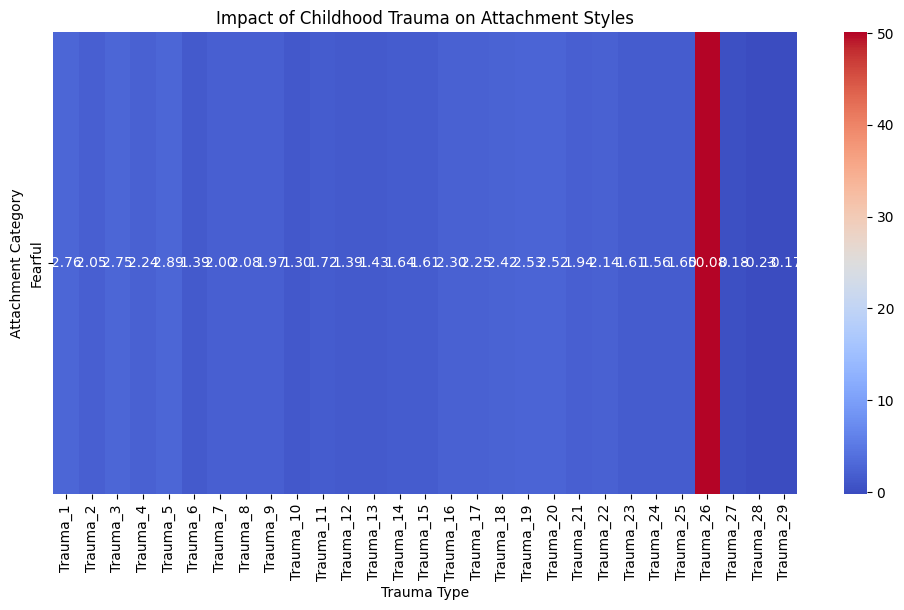

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by attachment style and compute mean trauma scores
attachment_trauma = merged_df.groupby("Attachment Category")[list(renamed_ctq_columns.values())].mean()

# Display the actual index values to debug
print("Available categories:", attachment_trauma.index.tolist())

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(attachment_trauma, cmap="coolwarm", annot=True, fmt=".2f")

plt.title("Impact of Childhood Trauma on Attachment Styles")
plt.xlabel("Trauma Type")
plt.ylabel("Attachment Category")
plt.show()